# Lab 8: Implement Your Machine Learning Project Plan

In this lab assignment, you will implement the machine learning project plan you created in the written assignment. You will:

1. Load your data set and save it to a Pandas DataFrame.
2. Perform exploratory data analysis on your data to determine which feature engineering and data preparation techniques you will use.
3. Prepare your data for your model and create features and a label.
4. Fit your model to the training data and evaluate your model.
5. Improve your model by performing model selection and/or feature selection techniques to find best model for your problem.

### Import Packages

Before you get started, import a few packages.

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need for this task.

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import time

## Part 1: Load the Data Set


You have chosen to work with one of four data sets. The data sets are located in a folder named "data." The file names of the three data sets are as follows:

* The "adult" data set that contains Census information from 1994 is located in file `adultData.csv`
* The airbnb NYC "listings" data set is located in file  `airbnbListingsData.csv`
* The World Happiness Report (WHR) data set is located in file `WHR2018Chapter2OnlineData.csv`
* The book review data set is located in file `bookReviewsData.csv`



<b>Task:</b> In the code cell below, use the same method you have been using to load your data using `pd.read_csv()` and save it to DataFrame `df`.

In [3]:
filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")
df = pd.read_csv(filename, header=0)

## Part 2: Exploratory Data Analysis

The next step is to inspect and analyze your data set with your machine learning problem and project plan in mind. 

This step will help you determine data preparation and feature engineering techniques you will need to apply to your data to build a balanced modeling data set for your problem and model. These data preparation techniques may include:
* addressing missingness, such as replacing missing values with means
* renaming features and labels
* finding and replacing outliers
* performing winsorization if needed
* performing one-hot encoding on categorical features
* performing vectorization for an NLP problem
* addressing class imbalance in your data sample to promote fair AI


Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.


<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. 

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [5]:
# snippet of the data set
df.head()

,Review,Positive Review
0,This was perhaps the best of Johannes Steinhof...,True
1,This very fascinating book is a story written ...,True
2,The four tales in this collection are beautifu...,True
3,The book contained more profanity than I expec...,False
4,We have now entered a second time of deep conc...,True


In [6]:
df.shape

(1973, 2)

In [7]:
df.dtypes

Review             object
Positive Review      bool
dtype: object

In [8]:
df.columns.values

array(['Review', 'Positive Review'], dtype=object)

In [9]:
# the first example
df['Review'][0]

"This was perhaps the best of Johannes Steinhoff's books, since it does not  deal with his own stellar yet tragic WW II and post war career. The  insights of the average person living in Germany are of great importance to  both social and military historians alike. Steinhoff offered this  collective testament as a warning to all of us regarding war and the rise  of a dictator. As Johannes said in an interview, &quot;It is always the  civilians who suffer the most, yet are remembered the least.&quot\n"

In [10]:
counts = df['Positive Review'].value_counts()
counts

False    993
True     980
Name: Positive Review, dtype: int64

In [11]:
# check class imbalance
counts[True]/sum(counts.values)

0.496705524581855

In [12]:
# check if there's a null value
print(sum(df['Positive Review'].isnull()) > 0)
print(sum(df['Review'].isnull()) > 0)

False
False


## Part 3: Implement Your Project Plan

<b>Task:</b> Use the rest of this notebook to carry out your project plan. You will:

1. Prepare your data for your model and create features and a label.
2. Fit your model to the training data and evaluate your model.
3. Improve your model by performing model selection and/or feature selection techniques to find best model for your problem.


Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit.

In [4]:
#label
y = df['Positive Review'] 
X = df['Review']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=1234)

In [6]:
# 1. Create a TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()


# 2. Fit the vectorizer to X_train
tfidf_vectorizer.fit(X_train)


# 3. Using the fitted vectorizer, transform the training data 
X_train_tfidf = tfidf_vectorizer.transform(X_train)


# 4. Using the fitted vectorizer, transform the test data 
X_test_tfidf = tfidf_vectorizer.transform(X_test)


In [7]:
vocabulary_size = len(tfidf_vectorizer.vocabulary_)

print(vocabulary_size)

19029


In [15]:
# 1. Create neural network model object
nn_model = keras.Sequential()

# 2. Create the input layer and add it to the model object: 
input_layer = keras.layers.InputLayer(input_shape=(vocabulary_size,), name='input')
nn_model.add(input_layer)

# 3. Create the first hidden layer and add it to the model object:
hidden_layer_1 = keras.layers.Dense(units=64, activation='relu', name='hl_1')
nn_model.add(hidden_layer_1)
nn_model.add(keras.layers.Dropout(.15))

# 4. Create the second layer and add it to the model object:
hidden_layer_2 = keras.layers.Dense(units=32, activation='relu', name='hl_2')
nn_model.add(hidden_layer_2)
nn_model.add(keras.layers.Dropout(.15))

# 5. Create the third layer and add it to the model object:
hidden_layer_3 = keras.layers.Dense(units=16, activation='relu', name='hl_3')
nn_model.add(hidden_layer_3)
nn_model.add(keras.layers.Dropout(.15))

# 6. Create the output layer and add it to the model object:
# Create input layer:
output_layer = keras.layers.Dense(units=1, activation='sigmoid', name='output') 

# Add output_layer to the model object:
nn_model.add(output_layer)

# Print summary of neural network model structure
nn_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hl_1 (Dense)                 (None, 64)                1217920   
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
hl_2 (Dense)                 (None, 32)                2080      
_________________________________________________________________
dropout_4 (Dropout)          (None, 32)                0         
_________________________________________________________________
hl_3 (Dense)                 (None, 16)                528       
_________________________________________________________________
dropout_5 (Dropout)          (None, 16)                0         
_________________________________________________________________
output (Dense)               (None, 1)                

In [16]:
sgd_optimizer = keras.optimizers.SGD(learning_rate=0.1)

In [17]:
loss_fn = keras.losses.BinaryCrossentropy(from_logits=False)

In [18]:
nn_model.compile(optimizer=sgd_optimizer, loss=loss_fn, metrics=['accuracy'])

In [19]:
class ProgBarLoggerNEpochs(keras.callbacks.Callback):
    
    def __init__(self, num_epochs: int, every_n: int = 50):
        self.num_epochs = num_epochs
        self.every_n = every_n
    
    def on_epoch_end(self, epoch, logs=None):
        if (epoch + 1) % self.every_n == 0:
            s = 'Epoch [{}/ {}]'.format(epoch + 1, self.num_epochs)
            logs_s = ['{}: {:.4f}'.format(k.capitalize(), v)
                      for k, v in logs.items()]
            s_list = [s] + logs_s
            print(', '.join(s_list))

In [20]:
t0 = time.time() # start time

num_epochs = 35 #epochs

history = nn_model.fit(
    X_train_tfidf.toarray(),
    y_train,
    epochs=num_epochs,
    verbose=0, # disable the default progress bar
    callbacks=[ProgBarLoggerNEpochs(num_epochs, every_n=5)],
    validation_split=0.2
)


t1 = time.time() # stop time

print('Elapsed time: %.2fs' % (t1-t0))

Epoch [5/ 35], Loss: 0.6859, Accuracy: 0.5594, Val_loss: 0.6852, Val_accuracy: 0.5127
Epoch [10/ 35], Loss: 0.6024, Accuracy: 0.7179, Val_loss: 0.6134, Val_accuracy: 0.6709
Epoch [15/ 35], Loss: 0.4856, Accuracy: 0.7758, Val_loss: 0.8259, Val_accuracy: 0.5253
Epoch [20/ 35], Loss: 0.3865, Accuracy: 0.8384, Val_loss: 0.7701, Val_accuracy: 0.6266
Epoch [25/ 35], Loss: 0.3250, Accuracy: 0.8811, Val_loss: 0.6169, Val_accuracy: 0.7152
Epoch [30/ 35], Loss: 0.3139, Accuracy: 0.8914, Val_loss: 0.4057, Val_accuracy: 0.8133
Epoch [35/ 35], Loss: 0.0356, Accuracy: 0.9960, Val_loss: 0.5107, Val_accuracy: 0.8101
Elapsed time: 18.27s


In [21]:
loss, accuracy = nn_model.evaluate(X_test_tfidf.toarray(), y_test, verbose=0)

print('Loss: ', str(loss) , 'Accuracy: ', str(accuracy))

Loss:  0.5132986307144165 Accuracy:  0.8253164291381836


I wish I could've experimented pre-processing with n-grams and stop words. However, whenever I added pre-processing in the TfidfVectorizer() parameter and ran the two bottom cells, the kernel died. 

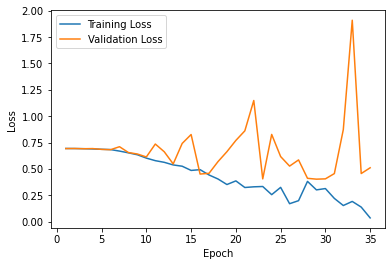

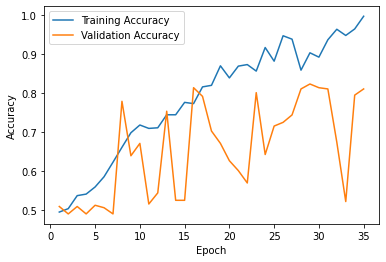

In [22]:
# visualization: Plot training and validation loss
plt.plot(range(1, num_epochs + 1), history.history['loss'], label='Training Loss')
plt.plot(range(1, num_epochs + 1), history.history['val_loss'], label='Validation Loss')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


# Plot training and validation accuracy
plt.plot(range(1, num_epochs + 1), history.history['accuracy'], label='Training Accuracy')
plt.plot(range(1, num_epochs + 1), history.history['val_accuracy'], label='Validation Accuracy')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [23]:
# make predictions
probability_predictions = nn_model.predict(X_test_tfidf.toarray())

print("Predictions for the first 10 examples:")
print("Probability\t\t\tClass")
for i in range(0,10):
    if probability_predictions[i] >= .5:
        class_pred = "Good Review"
    else:
        class_pred = "Bad Review"
    print(str(probability_predictions[i]) + "\t\t\t" + str(class_pred))

Predictions for the first 10 examples:
Probability			Class
[0.99274445]			Good Review
[0.94489074]			Good Review
[0.77588075]			Good Review
[0.40360057]			Bad Review
[0.9318875]			Good Review
[0.87763786]			Good Review
[0.04090399]			Bad Review
[0.00379544]			Bad Review
[0.99579895]			Good Review
[0.9951979]			Good Review


In [27]:
# prediction example(good review)
print('Review #1:\n')
print(X_test.to_numpy()[1])

goodReview = True if probability_predictions[1] >= .5 else False
    
print('\nPrediction: Is this a good review? {}\n'.format(goodReview))

print('Actual: Is this a good review? {}\n'.format(y_test.to_numpy()[1]))

Review #1:

"When I first came to Iran, black clad women all seemed the same. Scary unsmiling servants of the Ayatollas"

Having visited the Islamic Republic of Iran in June, I was better prepared for that vast country portrayed by Elaine Sciolino in her book Persian Mirrors. I am more than grateful for this book, which alerted me to the diversity of cultures, and the general way of life so absolutely different from the Western world.
Elaine Sciolino made me so very aware of the perfect social world of the Iranians and also I am thrilled to say that once you make a friend of an Iranian, you have a friend for life.
My most treasured memories of Iran will never leave me and I thank Ms Sciolino for preparing me for that journey. 
Reviewed by Heather Marshall Negahdar (SUGAR-CANE 11/10/05)


Prediction: Is this a good review? True

Actual: Is this a good review? True



In [28]:
#prediction example(bad review)
print('Review #2:\n')
print(X_test.to_numpy()[3])

goodReview = True if probability_predictions[3] >= .5 else False
    
print('\nPrediction: Is this a good review? {}\n'.format(goodReview))

print('Actual: Is this a good review? {}\n'.format(y_test.to_numpy()[3]))

Review #2:

While this book is a good attempt at placing statistical topics necessary to toxicology in one spot, the mistakes are inexcusable.  Many formula are incorrect as well as text referring to the wrong tables or data. Therefore, one begins to lose trust in the information presented.  Be careful if you use this book


Prediction: Is this a good review? False

Actual: Is this a good review? False

